# Clustering Drugs from DrugBank

What chemical space is covered by DrugBank?

In [1]:
from collections import defaultdict
import itertools as itt

import bio2bel_drugbank
import bio2bel_hgnc
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
hgnc_manager = bio2bel_hgnc.Manager()

In [4]:
drugbank_manager = bio2bel_drugbank.Manager()

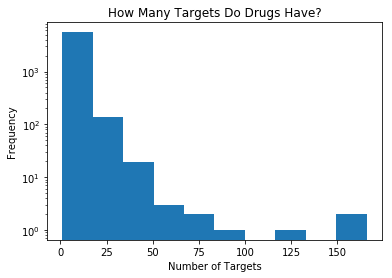

In [5]:
drug_to_hgnc_symbols = drugbank_manager.get_drug_to_hgnc_symbols()

drug_promiscuity_histogram = [len(hgnc_symbols) for hgnc_symbols in drug_to_hgnc_symbols.values()]

plt.title('How Many Targets Do Drugs Have?')
plt.xlabel('Number of Targets')
plt.ylabel('Frequency')
plt.hist(drug_promiscuity_histogram, log=True)
plt.show()

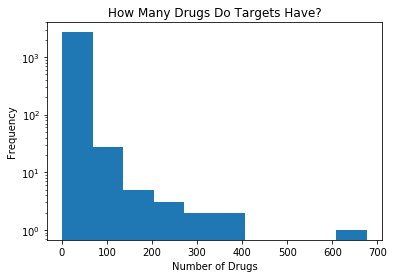

In [6]:
hgnc_symbol_to_drugs = defaultdict(set)
for drug, genes in drug_to_hgnc_symbols.items():
    for gene in genes:
        hgnc_symbol_to_drugs[gene].add(drug)

target_promiscuity_histogram = [len(drugs) for drugs in hgnc_symbol_to_drugs.values()]      

plt.title('How Many Drugs Do Targets Have?')
plt.xlabel('Number of Drugs')
plt.ylabel('Frequency')
plt.hist(target_promiscuity_histogram, log=True)
plt.show()

In [7]:
%%time
drugs = [drug.name for drug in drugbank_manager.list_drugs()]
print(len(drugs))

11033
CPU times: user 401 ms, sys: 25.9 ms, total: 427 ms
Wall time: 459 ms


In [8]:
%%time

hgnc_id_symbol_mapping = hgnc_manager.build_hgnc_id_symbol_mapping()

targets = [
    hgnc_id_symbol_mapping[protein.hgnc_id[len('HGNC:'):]] 
    for protein in drugbank_manager.list_proteins() 
    if protein.hgnc_id
]
print(len(targets))

2749
CPU times: user 282 ms, sys: 9.01 ms, total: 291 ms
Wall time: 391 ms


In [9]:
%%time

index = [drug for drug in drugs[:5] if drug in drug_to_hgnc_symbols]
columns = targets[100:]

r = [
    [
        target in drug_to_hgnc_symbols[drug]
        for target in columns
    ]
    for drug in index
]

CPU times: user 2.26 ms, sys: 48 µs, total: 2.31 ms
Wall time: 2.31 ms


In [10]:
df = pd.DataFrame(r, index=index, columns=columns)
df

,FGFR3,HSPG2,GCGR,GLP2R,GLP1R,PLA2G4A,CYP3A4,XDH,CYP2E1,VAMP2,...,YWHAH,YWHAQ,YWHAZ,IFNA2,MSLN,ADAMTS13,SMN1,NOD2,RPE65,SSTR4
Lepirudin,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Cetuximab,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Denileukin diftitox,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Etanercept,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# To Do

- Use appropriate distance function (jaccard) to calculate similarity between molecules based on targets
- Use RDKit to calculate descriptors for all molecules and use dimensionality reduction to plot the "chemical space"